In [1]:
import torch

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hussainnasirkhan/multiple-linear-regression-dataset")

print("Path to dataset files:", path)

c:\Users\Srikar\.conda\envs\pytorchdev\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Srikar\.cache\kagglehub\datasets\hussainnasirkhan\multiple-linear-regression-dataset\versions\1


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(f"{path}" + "/multiple_linear_regression_dataset.csv", sep=",")
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


In [5]:
import matplotlib.pyplot as plt

In [6]:
df["age"]

0     25
1     30
2     47
3     32
4     43
5     51
6     28
7     33
8     37
9     39
10    29
11    47
12    54
13    51
14    44
15    41
16    58
17    23
18    44
19    37
Name: age, dtype: int64

In [7]:
df.sort_values(by="experience")

,age,experience,income
0,25,1,30450
17,23,1,30870
10,29,1,27840
2,47,2,31580
1,30,3,35670
7,33,4,37650
13,51,4,34800
3,32,5,40130
6,28,5,41340
8,37,5,40250


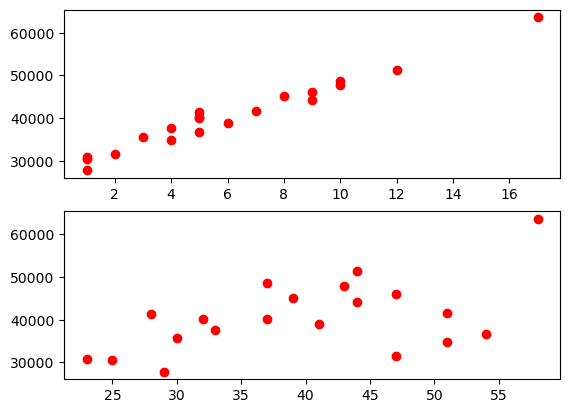

In [22]:
plt.subplot(2,1,1)
plt.plot(df["experience"], df["income"], 'ro')
plt.subplot(2,1,2)
plt.plot(df["age"], df["income"], 'ro')
plt.show()

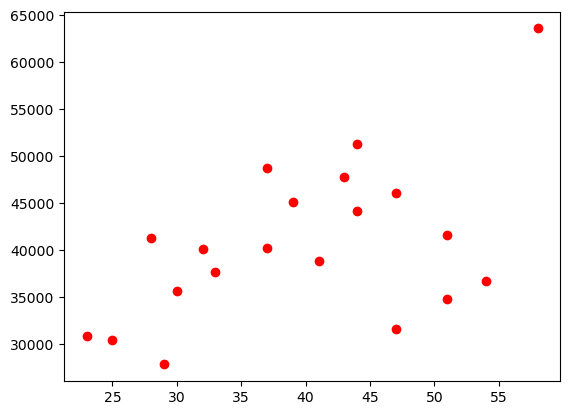

In [20]:
plt.plot(df["age"], df["income"], 'ro')
plt.show()

In [9]:
import numpy as np

In [10]:
import random

In [11]:
class linearRegressor:
    def __init__(self) -> None:
        self.w = 0.3
        self.b = 0.4

    def forward(self, X):
        y_pred = [self.w*x + self.b for x in X]
        return y_pred

    def loss(self, y_pred, y_expected):
        y_pred = np.array(y_pred)
        y_expected = np.array(y_expected)
        return np.mean((y_expected-y_pred)**2)
    
    def backward(self, y, X, lr = 0.01):
        f = y - (self.w*X + self.b)
        N = len(X)
        self.w -= lr * (-2 * X.dot(f).sum() / N)
        self.b -= lr * (-2 * f.sum() / N)
        return self.w, self.b

In [12]:
lr = linearRegressor()
losses = []

In [13]:
y_pred = lr.forward(df["experience"])
lr.loss(y_pred, df["income"])
w,b = lr.backward(df["income"], df["experience"])

In [14]:
y_train  = df["income"]
X_train  = np.array(df["experience"])
print(X_train.shape, y_train.shape)

(20,) (20,)


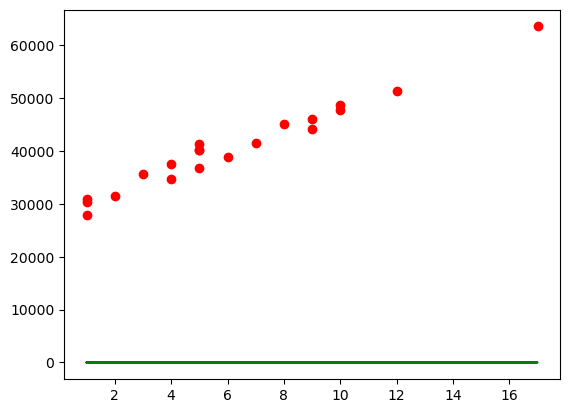

In [15]:
# Train the model for 200 iterations
y_train  = df["income"]
X_train  = np.array(df["experience"])
plt.plot(df["experience"], df["income"], 'ro')
plt.plot(X_train, y_pred, color = "g")
plt.show()

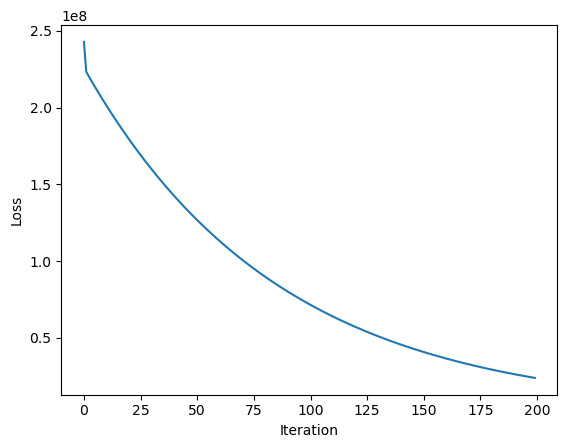

In [ ]:
# Train the model
for i in range(800):
    y_pred = lr.forward(X_train)
    loss = lr.loss(y_pred, y_train)
    lr.backward(y_train, X_train, lr=0.01)
    losses.append(loss)
# Plot the learning process
plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

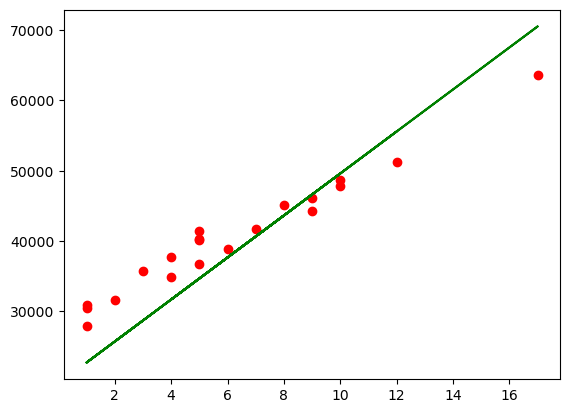

In [17]:
plt.plot(df["experience"], df["income"], 'ro')
plt.plot(X_train, y_pred, color = "g")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()

In [ ]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

Coefficients: 
 [[2014.04084158]] [28248.44678218]
Mean squared error: 2117888.88
Coefficient of determination: 0.97


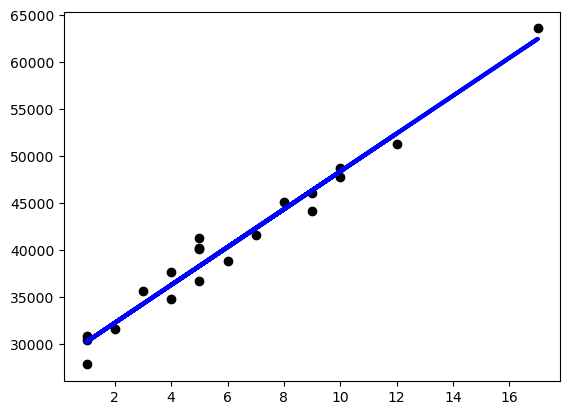

In [ ]:
y_pred = model.predict(X_train)
print("Coefficients: \n", model.coef_, model.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))

# Plot outputs
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_pred, color="blue", linewidth=3)
plt.show()

In [ ]:
import torch.nn as nn

In [ ]:
class linearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(linearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
model = linearRegression(1, 1)

criterion = nn.MSELoss()
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
for epoch in range(100):
    inputs = torch.Tensor(X_train).requires_grad_()
    labels = torch.Tensor(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1726581760.0
epoch 1, loss 526435840.0
epoch 2, loss 285670048.0
epoch 3, loss 236536288.0
epoch 4, loss 225684960.0
epoch 5, loss 222486224.0
epoch 6, loss 220821984.0
epoch 7, loss 219470240.0
epoch 8, loss 218186848.0
epoch 9, loss 216923088.0
epoch 10, loss 215669072.0
epoch 11, loss 214422832.0
epoch 12, loss 213184000.0
epoch 13, loss 211952400.0
epoch 14, loss 210727984.0
epoch 15, loss 209510704.0
epoch 16, loss 208300560.0
epoch 17, loss 207097408.0
epoch 18, loss 205901360.0
epoch 19, loss 204712272.0
epoch 20, loss 203530080.0
epoch 21, loss 202354848.0
epoch 22, loss 201186448.0
epoch 23, loss 200024800.0
epoch 24, loss 198870032.0
epoch 25, loss 197721968.0
epoch 26, loss 196580576.0
epoch 27, loss 195445856.0
epoch 28, loss 194317776.0
epoch 29, loss 193196256.0
epoch 30, loss 192081328.0
epoch 31, loss 190972832.0
epoch 32, loss 189870848.0
epoch 33, loss 188775248.0
epoch 34, loss 187686112.0
epoch 35, loss 186603312.0
epoch 36, loss 185526816.0
epoch 37, 

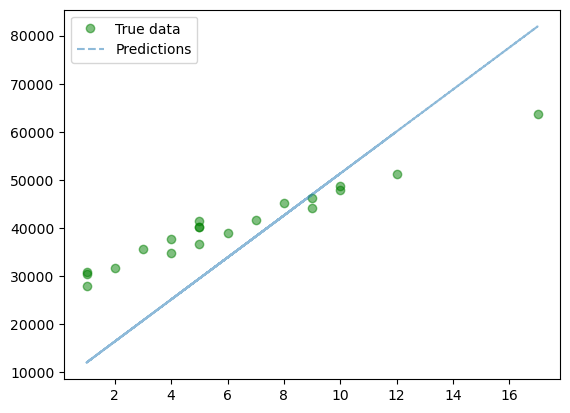

In [ ]:
predicted = model(torch.Tensor(X_train).requires_grad_()).data.numpy()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()